# Deeper analysis of the data
The data is split into 10 classes, search for important attributes for each class.
or each **`train_smpl_<label>`** file, record the first 10 pixels, in order of the absolute
correlation value, for each street sign.

# Scatter plots

In [1]:
import pandas as pd
import numpy as np

from Scripts import helperfn as hf

X, y = hf.get_data(0)

from Scripts import pixelFinder as pf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Scripts import downsample
%load_ext autoreload
%autoreload 2

In [2]:
downscaledX = downsample.downscale(X)
combined = hf.append_result_col(pd.DataFrame(X), y)
combinedDownscaled = hf.append_result_col(pd.DataFrame(downscaledX), y)

# --- SPLITTING INTO LABELS OF 1 AND 0 ---
# LABEL 0 - 210 VALUES
# LABEL 1 - 9480 VALUES

zeroLabel = []
zeroLabelDownscaled = []

for i in range(len(combined)):
    if combined.at[i, 'y'] == 0:
        zeroLabel.append(combined.loc[[i]])
        
    # elif combined.at[i, 'y'] == 1:
    #     oneLabel.append(combined.loc[[i]])

for i in range(len(combinedDownscaled)):
    if combinedDownscaled.at[i, 'y'] == 0:
        zeroLabelDownscaled.append(combinedDownscaled.loc[[i]])

# --- FINDING AVERAGE GREYSCALE VALUE FOR EACH COLUMN ---

    # Turning the list back into a DF
zeroDataframe = pd.DataFrame(pd.concat(zeroLabel))
zeroDataframeDownscaled = pd.DataFrame(pd.concat(zeroLabelDownscaled))
     
ColumnAverageGreyscale = zeroDataframe.mean(axis=0).drop(labels=['y'])
ColumnAverageGreyscaleDownscaled = zeroDataframeDownscaled.mean(axis=0).drop(labels=['y'])


In [7]:
#####################################################################################
# --- FINDING AVERAGE GREYSCALE VALUE FOR EACH ROW ---

transposedImagesOriginal = []
transposedImagesDownscaled = []
something = combined.drop('y', 1).to_numpy()
something2 = combinedDownscaled.drop('y', 1).to_numpy()

for i in range(something.shape[0]):
    currentImage = something[i]
    currentImage = currentImage.reshape(48,48)
    currentImage = np.transpose(currentImage)
    currentImage = currentImage.flatten()
    transposedImagesOriginal.append(currentImage)

for i in range(something2.shape[0]):
    currentImageDS = something2[i]
    currentImageDS = currentImageDS.reshape(24,24)
    currentImageDS = np.transpose(currentImageDS)
    currentImageDS = currentImageDS.flatten()
    transposedImagesDownscaled.append(currentImageDS)

transposedImagesOriginal = np.array(transposedImagesOriginal)
transposedData = pd.DataFrame(transposedImagesOriginal).join(combined['y'])

transposedImagesDownscaled = np.array(transposedImagesDownscaled)
transposedDataDS = pd.DataFrame(transposedImagesDownscaled).join(combinedDownscaled['y'])

transposedData0 = []
transposedData1 = []

for i in range(len(transposedData)):
    if transposedData.at[i, 'y'] == 0:
        transposedData0.append(transposedData.loc[[i]])

for i in range(len(transposedDataDS)):
    if transposedDataDS.at[i, 'y'] == 0:
        transposedData1.append(transposedDataDS.loc[[i]])

transData0 = pd.DataFrame(pd.concat(transposedData0)).drop('y', 1)
transData1 = pd.DataFrame(pd.concat(transposedData1)).drop('y', 1)

RowAverageGreyscale = transData0.mean(axis = 0).reset_index(drop=True)
RowAverageGreyscaleDownscaled = transData1.mean(axis = 0).reset_index(drop=True)



# 12 x 12 image

In [3]:
Trans12x12 = []
fullData = combined.drop('y', 1).to_numpy()
DS1 = downsample.downscale(fullData)
DS2 = downsample.downscale(DS1)

for i in range(DS2.shape[0]):
    imageAt = DS2[i]
    imageAt = imageAt.reshape(12,12)
    imageAt = np.transpose(imageAt).flatten()
    Trans12x12.append(imageAt)

Trans12x12 = np.array(Trans12x12)
dataframe12x12 = pd.DataFrame(Trans12x12).join(combined['y'])

Transposed12x12 = []

for i in range(len(dataframe12x12)):
    if dataframe12x12.at[i, 'y'] == 0:
        Transposed12x12.append(dataframe12x12.loc[[i]])

FinalDF12x12 = pd.DataFrame(pd.concat(Transposed12x12)).drop('y', 1)
Average144GS = FinalDF12x12.mean(axis=0)



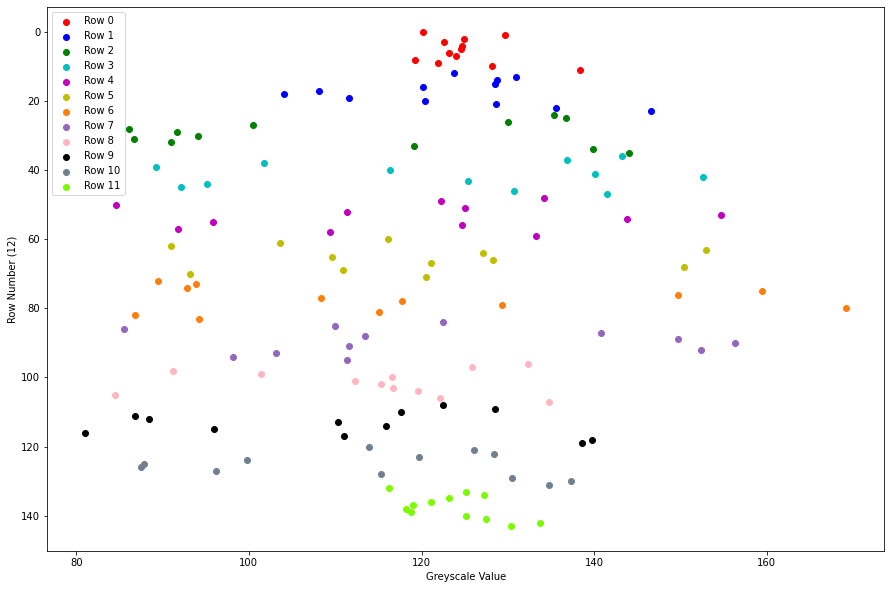

In [129]:
# type(Average144GS)
# print(Average144GS)
# print('=====================')
count = 0
groupX = {}
groupY = {}
N = 0
v = 0
while count < 12:
    groupX[N] = Average144GS.iloc[v:v+12]
    groupY[N] = Average144GS.index[v:v+12]
    count = count +1
    v = v +12
    N += 1

colours = ['r','b','g', 'c','m','y','tab:orange','tab:purple', 'lightpink', 'black','slategrey', 'lawngreen']
markerList = ['o', '.', ',','x','v','+','^','<','>','s','d','p']
markers = []
for i in range(len(groupX)):
    markers+= 12 * markerList[i]

fig12x12 = plt.figure(figsize=(15,10))

for i in range(len(groupX)):
    plt.scatter(groupX[i], groupY[i], label = 'Row ' + str(i), marker = markers[i], c= colours[i])

plt.gca().invert_yaxis()
plt.ylabel('Row Number (12)')
plt.xlabel('Greyscale Value')
plt.legend(loc='upper left') 
plt.show()

# print(groupX)



# Original Sample

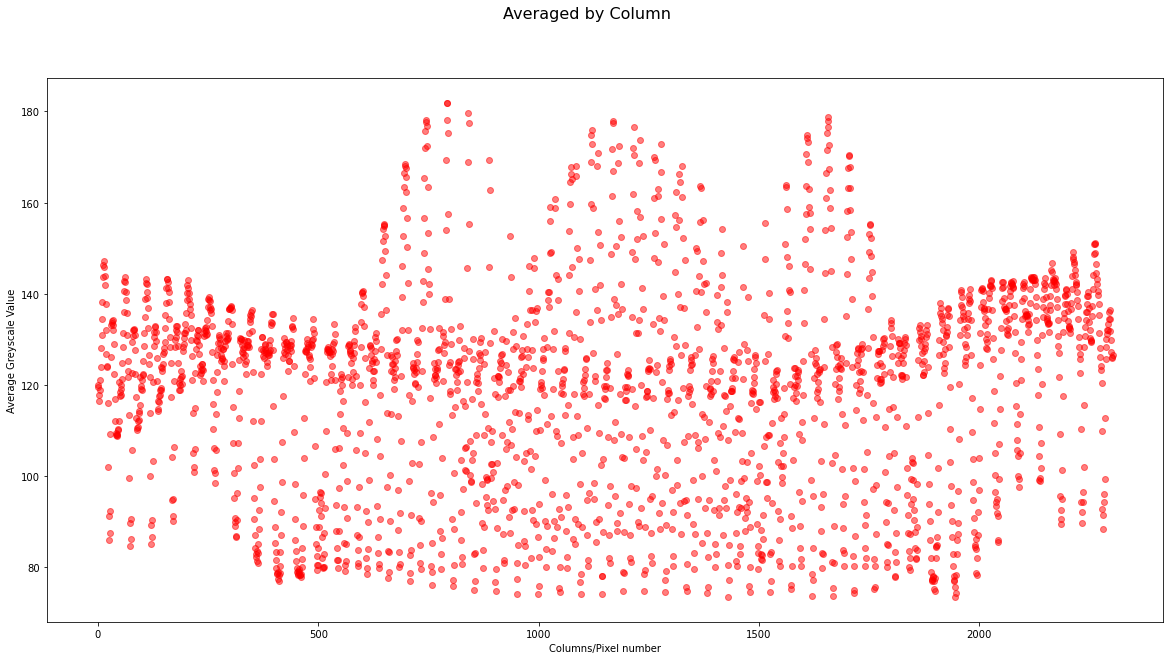

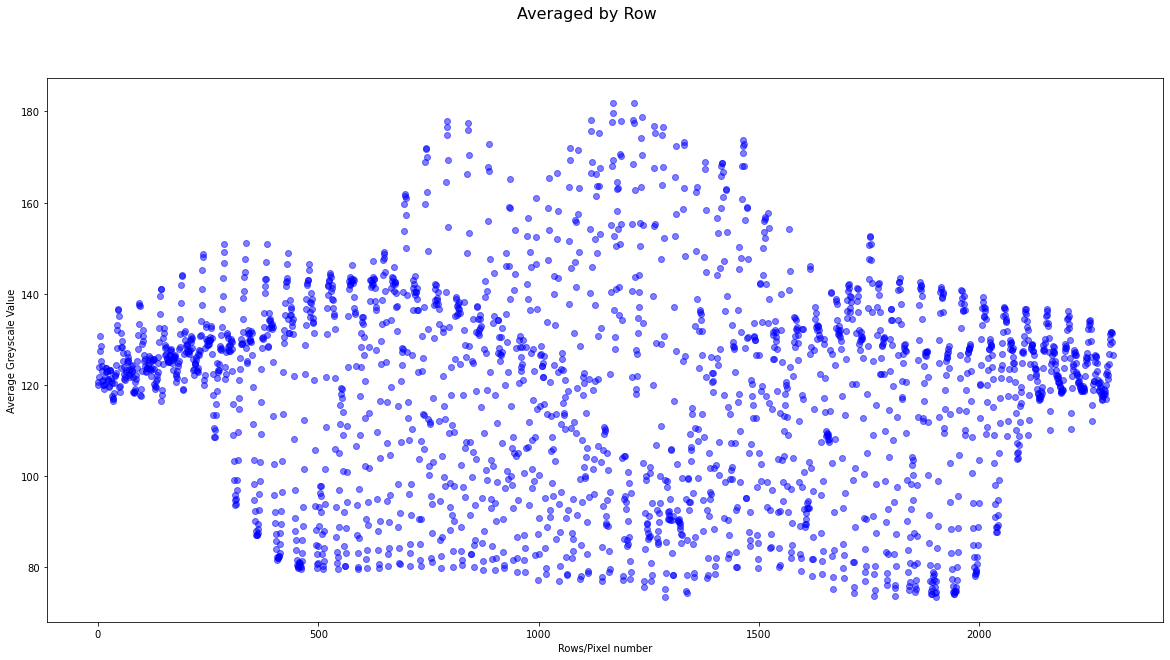

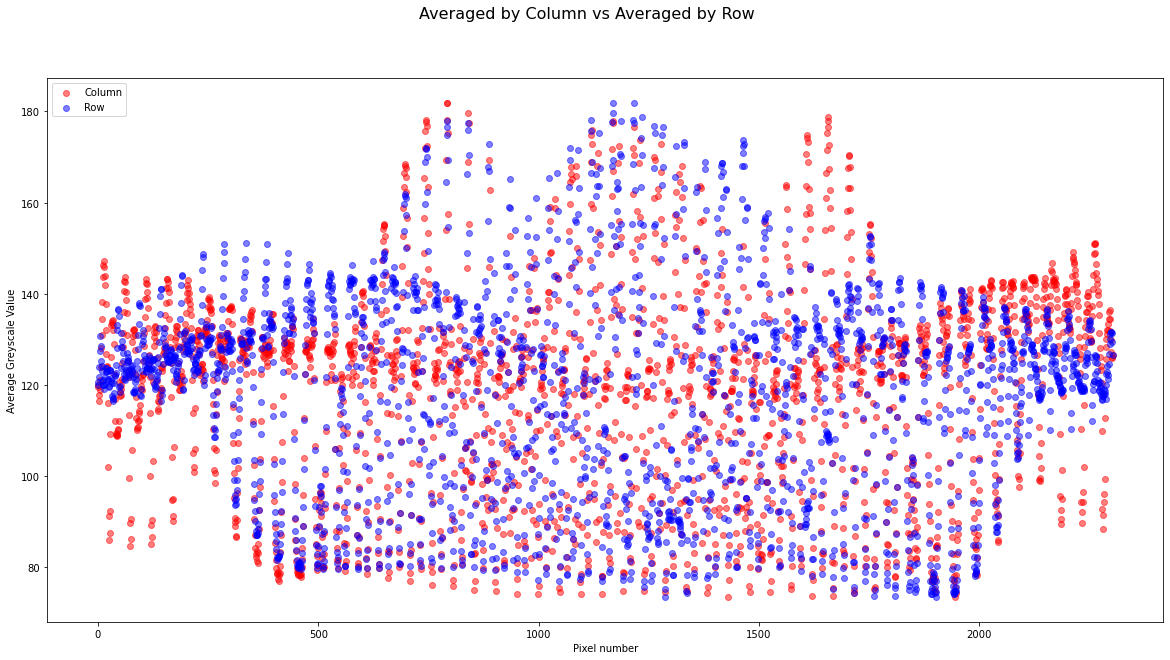

In [8]:


# --- BY COLUMN ---

xValues = ColumnAverageGreyscale.index    
yValues = ColumnAverageGreyscale


fig = plt.figure(figsize= (20,10))
fig.suptitle('Averaged by Column', fontsize =16)
plt.scatter(xValues, yValues , marker='o',c='r', alpha = 0.5)
plt.xticks(xValues[::500])
plt.ylabel('Average Greyscale Value')
plt.xlabel('Columns/Pixel number')
plt.show()

# --- BY ROW (transposed) ---

xValues2 = RowAverageGreyscale.index      
yValues2 = RowAverageGreyscale

fig = plt.figure(figsize= (20,10))
fig.suptitle('Averaged by Row', fontsize =16)
plt.scatter(xValues2, yValues2  , marker='o',c='b', alpha = 0.5)
plt.ylabel('Average Greyscale Value')
plt.xlabel('Rows/Pixel number')
plt.show()

# --- BOTH ---
fig = plt.figure(figsize=(20,10))
fig.suptitle('Averaged by Column vs Averaged by Row', fontsize =16)
ax1 = fig.add_subplot(111)

ax1.scatter(xValues, yValues, marker='o', c='r', alpha = 0.5, label='Column')         #Column
ax1.scatter(xValues2, yValues2, marker='o', c='b', alpha=0.5, label='Row')      #Row
plt.xticks(xValues[::500])
plt.ylabel('Average Greyscale Value')
plt.xlabel('Pixel number')
plt.legend(loc='upper left')
plt.show()


# Downsampled

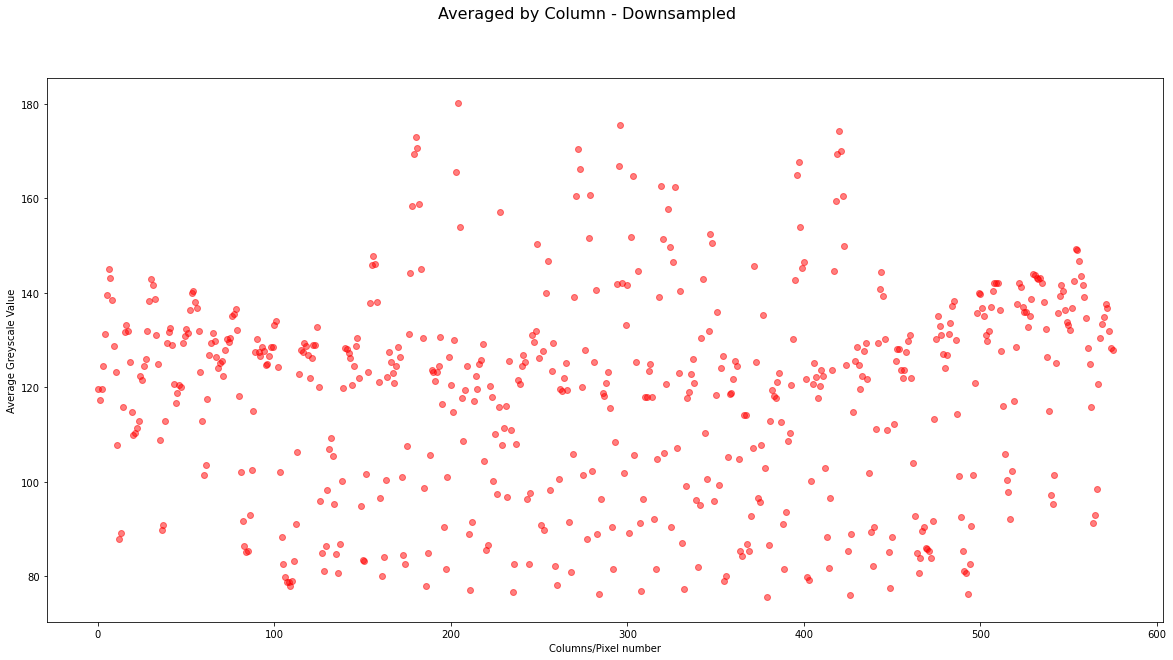

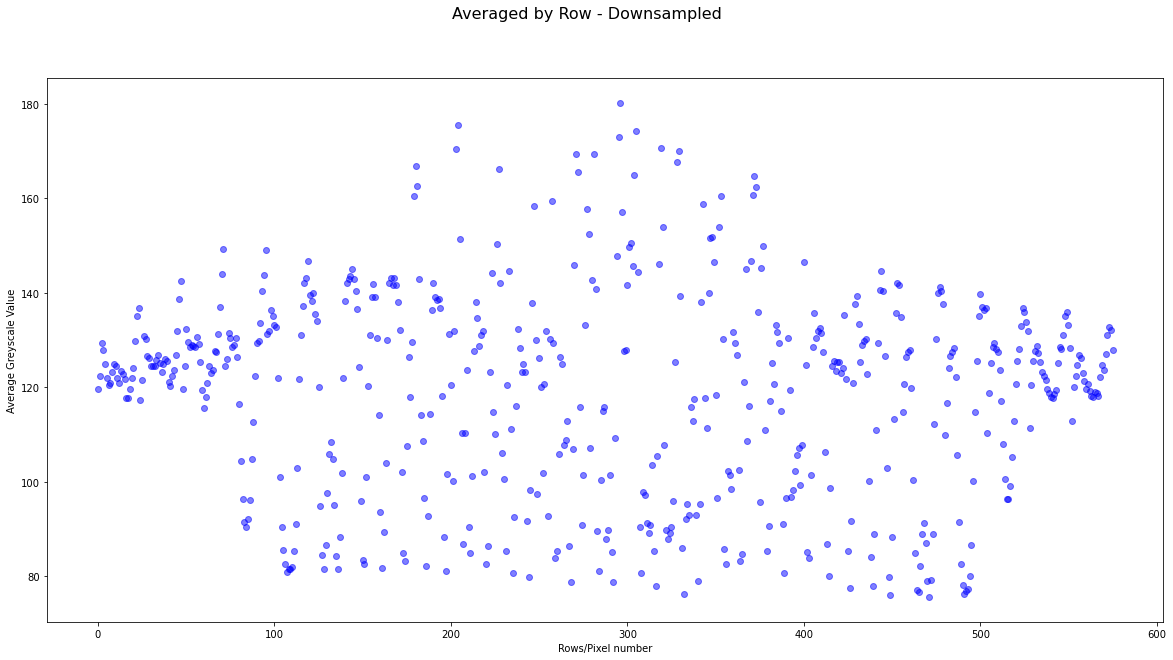

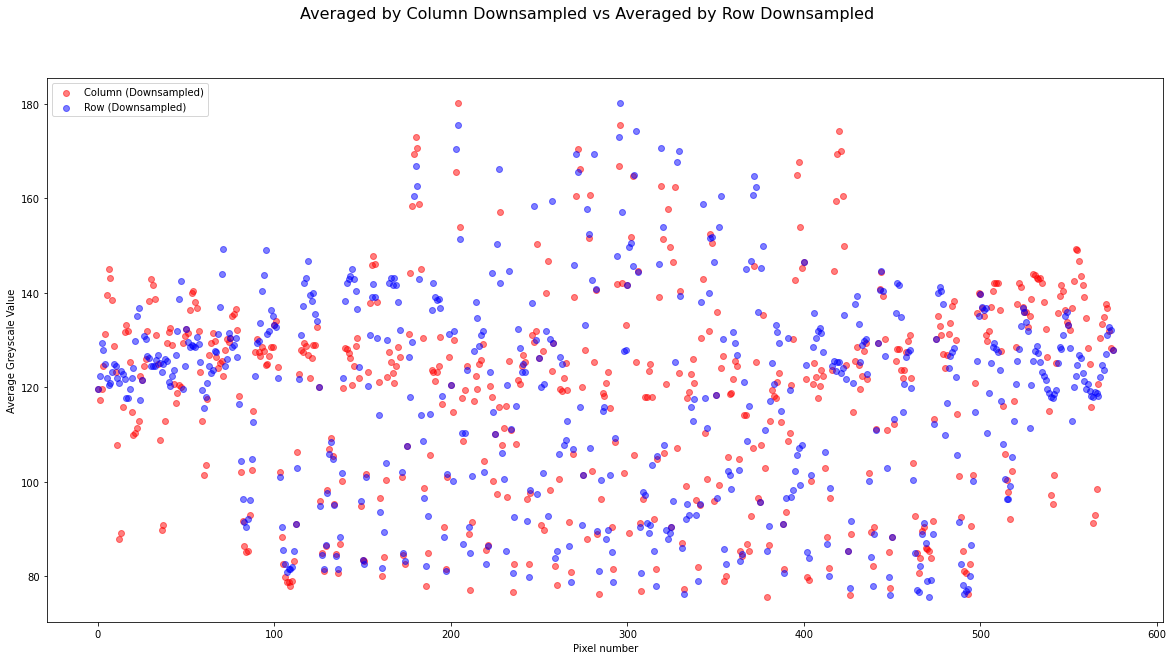

In [10]:
# --- Column Downscaled ---

yValuesDownscaled = ColumnAverageGreyscaleDownscaled
xValuesDownscaled = ColumnAverageGreyscaleDownscaled.index

fig1 = plt.figure(figsize= (20,10))
fig1.suptitle('Averaged by Column - Downsampled', fontsize =16)
plt.scatter(xValuesDownscaled, yValuesDownscaled, marker='o', c='r', alpha=0.5)

plt.ylabel('Average Greyscale Value')
plt.xlabel('Columns/Pixel number')
plt.show()


# --- Row Downscaled ---

yValuesDownscaled2 = RowAverageGreyscaleDownscaled
xValuesDownscaled2 = RowAverageGreyscaleDownscaled.index

fig1 = plt.figure(figsize= (20,10))
fig1.suptitle('Averaged by Row - Downsampled', fontsize =16)
plt.scatter(xValuesDownscaled2, yValuesDownscaled2, marker='o', c='b', alpha=0.5)
plt.ylabel('Average Greyscale Value')
plt.xlabel('Rows/Pixel number')
plt.show()

# --- BOTH ---
fig = plt.figure(figsize=(20,10))
fig.suptitle('Averaged by Column Downsampled vs Averaged by Row Downsampled', fontsize =16)
ax1 = fig.add_subplot(111)

ax1.scatter(xValuesDownscaled, yValuesDownscaled, marker='o', c='r', alpha = 0.5, label='Column (Downsampled)')         #Column
ax1.scatter(xValuesDownscaled2, yValuesDownscaled2, marker='o', c='b', alpha=0.5, label='Row (Downsampled)')      #Row
# plt.xticks(xValues[::100])
plt.ylabel('Average Greyscale Value')
plt.xlabel('Pixel number')
plt.legend(loc='upper left')
plt.show()

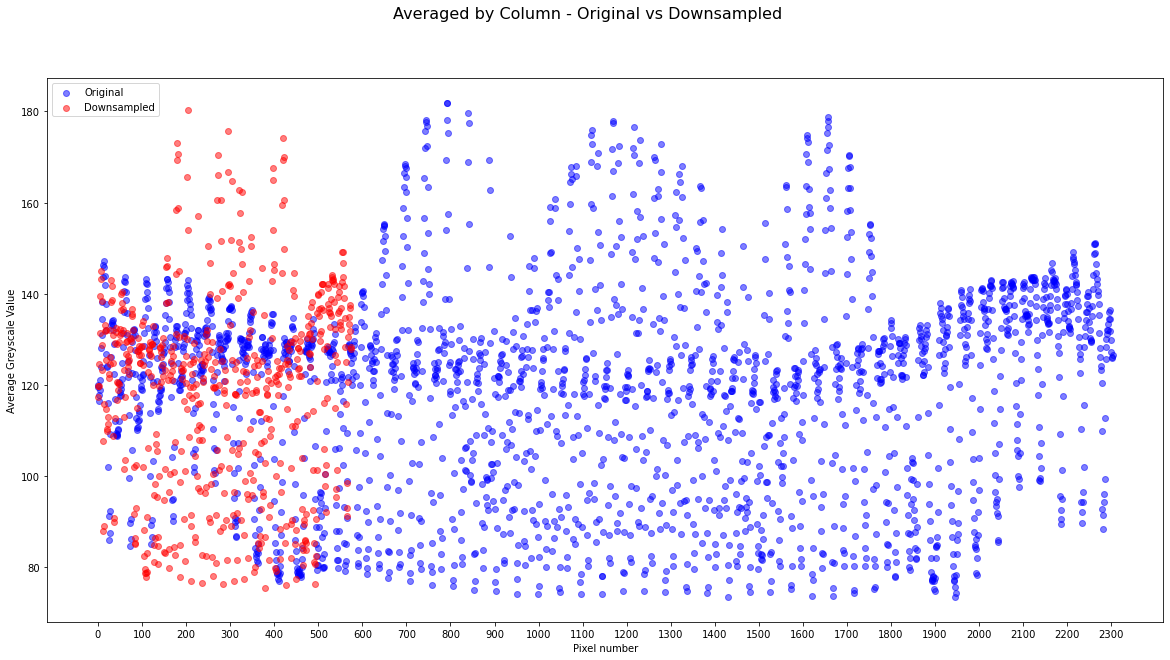

In [11]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Averaged by Column - Original vs Downsampled', fontsize =16)
ax1 = fig.add_subplot(111)

ax1.scatter(xValues, yValues, marker='o', c='b', alpha = 0.5, label='Original')
ax1.scatter(xValuesDownscaled, yValuesDownscaled, marker='o', c='r', alpha=0.5, label='Downsampled')
plt.xticks(xValues[::100])
plt.ylabel('Average Greyscale Value')
plt.xlabel('Pixel number')
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Averaged by Row - Original vs Downsampled', fontsize =16)
ax1 = fig.add_subplot(111)

ax1.scatter(xValues2, yValues2, marker='o', c='b', alpha = 0.5, label='Original')
ax1.scatter(xValuesDownscaled2, yValuesDownscaled2, marker='o', c='r', alpha=0.5, label='Downsampled')
plt.ylabel('Average Greyscale Value')
plt.xlabel('Pixel number')
plt.legend(loc='upper left')
plt.show()

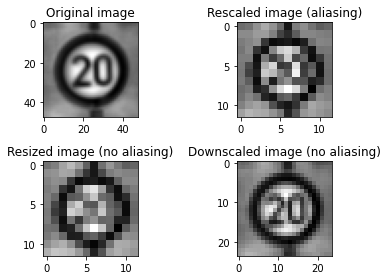

0       120.095238
1       119.576190
2       117.771429
3       116.395238
4       118.804762
           ...    
2299    129.871429
2300    127.257143
2301    125.861905
2302    126.176190
2303    126.600000
Length: 2304, dtype: float64


In [14]:
test = ColumnAverageGreyscale.values.reshape(-1,1)
downsample.visualise_downsample(test)

# something = np.pad(RowAverageGreyscale, (0, (2304 - len(RowAverageGreyscale))), 'constant')
# downsample.visualise_downsample(something)

print(ColumnAverageGreyscale)